⬇️ Downloading dataset from Kaggle...
Using Colab cache for faster access to the 'breast-cancer' dataset.
✅ Dataset downloaded at: /kaggle/input/breast-cancer
📄 Using dataset file: /kaggle/input/breast-cancer/data.csv

📊 Dataset Preview:
         id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave_points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974    

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.5985 - loss: 0.7234 - val_accuracy: 0.6593 - val_loss: 0.5690
Epoch 2/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6796 - loss: 0.5106 - val_accuracy: 0.7912 - val_loss: 0.4230
Epoch 3/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8380 - loss: 0.4090 - val_accuracy: 0.8681 - val_loss: 0.3444
Epoch 4/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9149 - loss: 0.3356 - val_accuracy: 0.9011 - val_loss: 0.2763
Epoch 5/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9635 - loss: 0.2557 - val_accuracy: 0.9341 - val_loss: 0.2197
Epoch 6/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9634 - loss: 0.1706 - val_accuracy: 0.9670 - val_loss: 0.1775
Epoch 7/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9617 - loss: 0.1533 - val_accuracy: 0.9560 - val_loss: 0.1488
Epoch 8/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9825 - loss: 0.1291 - val_accuracy: 0.9670 - val_loss: 0.1294
Ep

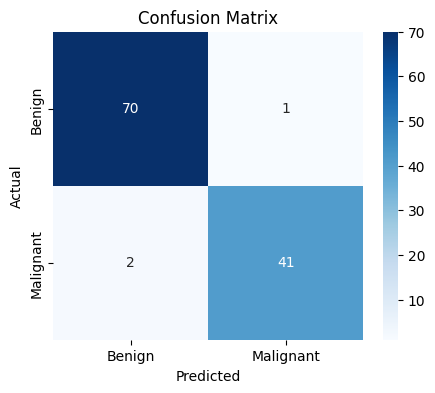

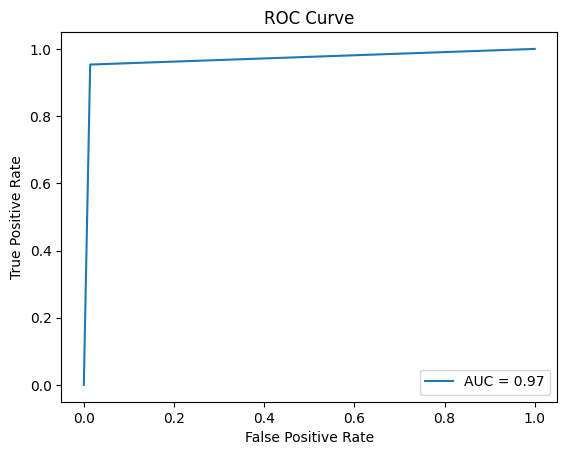

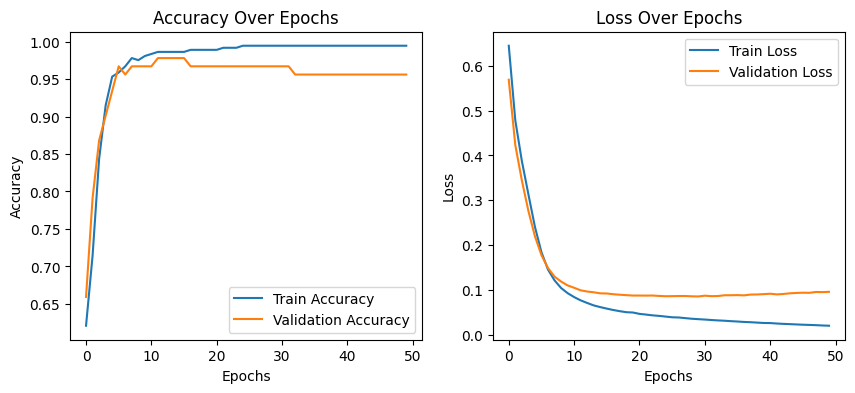


✅ Model saved as breast_cancer_ann_model.h5


In [ ]:


import kagglehub
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import seaborn as sns
import os

# Step 2: Download Dataset via KaggleHub
print("⬇️ Downloading dataset from Kaggle...")
path = kagglehub.dataset_download("adhamelkomy/breast-cancer")
print("✅ Dataset downloaded at:", path)

# Locate the CSV file
for file in os.listdir(path):
    if file.endswith(".csv"):
        dataset_path = os.path.join(path, file)
        break

print("📄 Using dataset file:", dataset_path)

# Step 3: Load the Dataset
data = pd.read_csv(dataset_path)
print("\n📊 Dataset Preview:")
print(data.head())

# Step 4: Data Preprocessing
# Drop the 'id' column as it is not a feature
data = data.drop('id', axis=1)

# Separate Features and Target
X = data.drop('diagnosis', axis=1)
y = data['diagnosis']

# Encode Target Variable
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)  # M→1, B→0

# Select only numeric columns for imputation and scaling
X_numeric = X.select_dtypes(include=np.number)


# Handle Missing Values (apply only to numeric features)
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X_numeric)

# Feature Scaling (apply only to imputed numeric features)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)


# Train-Test Split (80:20)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Step 5: Build ANN Model
model = Sequential([
    Dense(16, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(8, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Step 6: Compile the Model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Step 7: Train the Model
history = model.fit(X_train, y_train, epochs=50, batch_size=16, validation_split=0.2, verbose=1)

# Step 8: Evaluate Model
y_pred = (model.predict(X_test) > 0.5).astype(int)

print("\n✅ Model Evaluation Results:")
print("Accuracy:", round(accuracy_score(y_test, y_pred) * 100, 2), "%")
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Benign', 'Malignant'], yticklabels=['Benign', 'Malignant'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# ROC-AUC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred)
plt.plot(fpr, tpr, label=f"AUC = {auc:.2f}")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

# Step 9: Visualize Training Progress
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Step 10: Save the Model
model.save("breast_cancer_ann_model.h5")
print("\n✅ Model saved as breast_cancer_ann_model.h5")

In [1]:
# -------------------------------------------------
# 🌸 BREAST CANCER PREDICTOR UI
# -------------------------------------------------

import gradio as gr
import numpy as np

def predict_cancer(option, radius_mean, texture_mean, perimeter_mean, area_mean, smoothness_mean, compactness_mean):
    if option != "Custom Input":
        presets = {
            "Low Risk": [13.5, 18, 85, 500, 0.09, 0.10],
            "Medium Risk": [15.0, 20, 100, 700, 0.11, 0.13],
            "High Risk": [17.5, 23, 125, 900, 0.13, 0.15],
        }
        user_inputs = presets[option]
    else:
        user_inputs = [radius_mean, texture_mean, perimeter_mean, area_mean, smoothness_mean, compactness_mean]

    key_features = ['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean']
    avg_values = X.mean().values.copy()

    for i, col in enumerate(key_features):
        idx = list(X.columns).index(col)
        avg_values[idx] = user_inputs[i]

    user_array = np.array(avg_values).reshape(1, -1)
    user_scaled = scaler.transform(user_array)
    prediction = float(model.predict(user_scaled))

    if prediction > 0.5:
        diagnosis = "⚠️ Malignant (Cancer Detected)"
        color = "#FF4C4C"
        emoji = "🚨"
        confidence = prediction
    else:
        diagnosis = "✅ Benign (No Cancer Detected)"
        color = "#00B050"
        emoji = "🩷"
        confidence = 1 - prediction

    response = f"""
    <div style="
        background-color:#f9f9f9;
        border-radius:16px;
        padding:25px;
        box-shadow:0 0 15px rgba(0,0,0,0.08);
        text-align:center;
        font-family:'Segoe UI',sans-serif;">
        <h2 style="color:{color};margin-bottom:10px;">{emoji} {diagnosis}</h2>
        <p style="font-size:18px;">Model Confidence: <b>{confidence*100:.2f}%</b></p>
    </div>
    """
    return response, confidence


# ---------------- UI DESIGN ----------------
with gr.Blocks(css="""
    body {background: linear-gradient(135deg, #fafafa 0%, #f0f4ff 100%)}
    .gradio-container {max-width: 900px !important; margin:auto !important;}
""", theme=gr.themes.Soft()) as demo:

    gr.HTML("""
    <div style="text-align:center; margin-top:20px; margin-bottom:10px;">
        <h1 style="color:#2B3467;">🩺 Breast Cancer Prediction System</h1>
    </div>
    """)

    with gr.Tab("🔍 Prediction Panel"):
        gr.Markdown("### Choose a test scenario or input your own data:")

        with gr.Row():
            option = gr.Dropdown(["Low Risk", "Medium Risk", "High Risk", "Custom Input"],
                                 value="Low Risk", label="Prediction Mode", interactive=True)

        with gr.Accordion("📊 Custom Tumor Feature Inputs", open=False):
            with gr.Row():
                radius_mean = gr.Number(label="Radius Mean", value=14.0)
                texture_mean = gr.Number(label="Texture Mean", value=19.0)
                perimeter_mean = gr.Number(label="Perimeter Mean", value=90.0)
            with gr.Row():
                area_mean = gr.Number(label="Area Mean", value=600.0)
                smoothness_mean = gr.Number(label="Smoothness Mean", value=0.10)
                compactness_mean = gr.Number(label="Compactness Mean", value=0.12)

        predict_btn = gr.Button("✨ Predict", variant="primary", elem_id="predict-btn")
        output_html = gr.HTML(label="Prediction Result")
        confidence_bar = gr.Slider(0, 1, value=0, label="Model Confidence", interactive=False)

        predict_btn.click(
            fn=predict_cancer,
            inputs=[option, radius_mean, texture_mean, perimeter_mean, area_mean, smoothness_mean, compactness_mean],
            outputs=[output_html, confidence_bar]
        )

    with gr.Tab("📘 About Project"):
        gr.Markdown("""
        ### Overview
        This application demonstrates how **Deep Learning** can assist in early detection of breast cancer
        using **Artificial Neural Networks (ANN)**.
        The model analyzes key tumor characteristics and predicts whether a tumor is **Benign** or **Malignant**.

        ### Technologies Used
        - 🧠 TensorFlow
        - 🧮 Scikit-learn for preprocessing
        - 🎨 Gradio for interactive UI

        ---
        **Disclaimer:** This tool is for educational demonstration only and not for medical diagnosis.
        """)

demo.launch()


It looks like you are running Gradio on a hosted Jupyter notebook, which requires `share=True`. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://44d81c1bcb50f76366.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
